In [159]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import pysal

In [160]:
import libpysal

In [161]:
shp_file_path = 'visualize/viz_data/cb_2018_36_tract_500k.shp'

In [162]:
tractsshp = gpd.read_file(shp_file_path)

In [163]:
# get aggdf to filter the tracts
# import sys
# sys.path.append("../")
import pipeline
aggdf = pipeline.pipeline_with_aggdf(settings_name='dur100_repmedium')
tractlist = list(sorted(aggdf.census_tract.astype(str).str[0:11].unique()))
tractlist


/home/nikhil/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


['36005000200',
 '36005000400',
 '36005001600',
 '36005001900',
 '36005002000',
 '36005002300',
 '36005002500',
 '36005002701',
 '36005002702',
 '36005002800',
 '36005003100',
 '36005003300',
 '36005003500',
 '36005003700',
 '36005003800',
 '36005003900',
 '36005004001',
 '36005004100',
 '36005004200',
 '36005004300',
 '36005004400',
 '36005004600',
 '36005004800',
 '36005005001',
 '36005005002',
 '36005005100',
 '36005005200',
 '36005005400',
 '36005005600',
 '36005005902',
 '36005006000',
 '36005006200',
 '36005006300',
 '36005006400',
 '36005006500',
 '36005006700',
 '36005006800',
 '36005006900',
 '36005007000',
 '36005007100',
 '36005007200',
 '36005007300',
 '36005007400',
 '36005007500',
 '36005007600',
 '36005007700',
 '36005007800',
 '36005007900',
 '36005008300',
 '36005008400',
 '36005008500',
 '36005008600',
 '36005008700',
 '36005008900',
 '36005009000',
 '36005009200',
 '36005009300',
 '36005009600',
 '36005009800',
 '36005011502',
 '36005011700',
 '36005011800',
 '360050

In [164]:
print(tractsshp.shape)
tractsshp = tractsshp.loc[tractsshp.GEOID.isin(tractlist)].sort_values(by = 'GEOID').reset_index()
print(tractsshp.shape)

(4906, 10)
(2092, 11)


In [165]:
list(tractsshp.GEOID) == tractlist

True

In [166]:
shape_list = tractsshp.geometry.to_list()

In [167]:
adj_graph = libpysal.weights.Rook.from_iterable(shape_list).to_networkx()

/home/nikhil/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There is 1 island with id: 1897.
  warnings.warn(message)


In [168]:
adj_graph

In [169]:
import networkx as nx
# nx.draw(adj_graph)

In [170]:
tractsshp

,index,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,3986,36,005,000200,1400000US36005000200,36005000200,2,CT,479463,852046,"POLYGON ((-73.86522 40.81453, -73.86425 40.814..."
1,381,36,005,000400,1400000US36005000400,36005000400,4,CT,770689,690794,"POLYGON ((-73.85870 40.81540, -73.85778 40.815..."
2,68,36,005,001600,1400000US36005001600,36005001600,16,CT,485079,0,"POLYGON ((-73.86246 40.81925, -73.86153 40.819..."
3,2550,36,005,001900,1400000US36005001900,36005001900,19,CT,1668013,1143135,"POLYGON ((-73.93094 40.80825, -73.92922 40.809..."
4,1135,36,005,002000,1400000US36005002000,36005002000,20,CT,395564,0,"POLYGON ((-73.87050 40.82036, -73.86858 40.820..."
...,...,...,...,...,...,...,...,...,...,...,...
2087,4683,36,085,031902,1400000US36085031902,36085031902,319.02,CT,690539,296692,"POLYGON ((-74.17122 40.63744, -74.17109 40.642..."
2088,4086,36,085,032300,1400000US36085032300,36085032300,323,CT,3869216,462391,"POLYGON ((-74.19180 40.63983, -74.18940 40.642..."
2089,269,36,119,000203,1400000US36119000203,36119000203,2.03,CT,472670,175743,"POLYGON ((-73.91768 40.91950, -73.90894 40.918..."
2090,1962,36,119,001503,1400000US36119001503,36119001503,15.03,CT,775771,355475,"POLYGON ((-73.87740 40.90867, -73.87682 40.910..."


In [171]:
A = nx.adjacency_matrix(adj_graph)

In [172]:
# From Wes Gurnee https://github.com/fairmandering/gerrypy/blob/master/gerrypy/data/adjacency.py
import numpy as np
import networkx as nx
import pysal
import time
from scipy.spatial.distance import cdist, pdist, squareform


def connect_components(gdf, inclusion_factor=1.5):
    """
    Generates a connected adjacency graph from a (possibly disconnected) GeoDataFrame
    Args:
        gdf: (gpd.GeoDataFrame) geometry of a region
        inclusion_factor: (float) controls the number of edges used to connect components
    Returns: (nx.Graph) block adjacency graph of region
    """
    shape_list = gdf.geometry.to_list()
    # For the purpose of getting boundary node for connection algo
    outer = gdf.geometry.unary_union
    bbox = outer.envelope.buffer(1000)
    shape_list.append(bbox.difference(outer))
    G = libpysal.weights.Rook.from_iterable(shape_list).to_networkx()
    # len(gdf) indexes boundary dummy node
    boundaries = set(G[len(gdf)])
    G.remove_node(len(gdf))

    # connect components with closest centroids until one component
    centroids = np.stack([gdf.centroid.x, gdf.centroid.y]).T
    while not nx.is_connected(G):
        components = nx.connected_components(G)
        comp_boundaries = [list(set(c).intersection(boundaries)) for c in components]

        min_comp_dist = 1e20
        min_comps = (0, 0)
        for ix, c1 in enumerate(comp_boundaries[:-1]):
            for jx, c2 in enumerate(comp_boundaries[ix+1:]):
                comp_dist = cdist(centroids[c1], centroids[c2]).min()
                if comp_dist < min_comp_dist:
                    min_comp_dist = comp_dist
                    min_comps = (ix, ix + 1 + jx)
        print(min_comps, min_comp_dist)

        cix, cjx = min_comps
        c1, c2 = comp_boundaries[cix], comp_boundaries[cjx]
        threshold_distance = min_comp_dist * inclusion_factor
        c1_nodes, c2_nodes = np.nonzero(cdist(centroids[c1], centroids[c2]) < threshold_distance)
        for n1, n2 in zip(c1_nodes, c2_nodes):
            G.add_edge(c1[n1], c2[n2], inferred=True)

    return G

In [173]:
if not nx.is_connected(adj_graph):
    adj_graph_connected = connect_components(tractsshp, inclusion_factor=1.075)
    A_connected = nx.adjacency_matrix(adj_graph_connected)
else:
    A_connected = None

/home/nikhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

/home/nikhil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.



(1, 2) 0.0169582635259444
(0, 2) 0.027286054278059645
(0, 1) 0.042892417164626974


In [174]:
A_connected

<2092x2092 sparse matrix of type '<class 'numpy.float64'>'
	with 10620 stored elements in Compressed Sparse Row format>

In [175]:
A

<2092x2092 sparse matrix of type '<class 'numpy.float64'>'
	with 10604 stored elements in Compressed Sparse Row format>

In [176]:
import scipy

In [177]:
scipy.sparse.save_npz('tract_adjacency_disconnected.npz', A, compressed=True)
scipy.sparse.save_npz('tract_adjacency_connected.npz', A_connected, compressed=True)
import pickle 
pickle.dump(list(tractsshp.GEOID), open('tract_order_adjacency', 'wb') )

In [178]:
def draw_adjacency_graph(gdf, G, include_tract_shapes=True, include_graph=True, size=(50, 37.5)):
    edgecolor = 'black' if include_tract_shapes else 'white'
    base = gdf.plot(color='white', edgecolor=edgecolor, figsize=size, lw=1)
    edge_colors = ['green' if G[u][v].get('inferred', False) else 'red'
                   for u, v in G.edges]
    pos = {i: (geo.centroid.x, geo.centroid.y)
           for i, geo in gdf.geometry.iteritems()}
    if len(G) == len(gdf) + 1:  # If adj graph with dummy node
        pos[len(gdf)] = (min(gdf.centroid.x), min(gdf.centroid.y))
    nx.draw_networkx(G,
                     pos=pos,
                     ax=base,
                     node_size=1 if include_graph else 0,
                     width=.5,
                     linewidths=.5,
                     with_labels=False,
                     edge_color=edge_colors if include_graph else 'none')
    base.axis('off')
    return base

<AxesSubplot:>

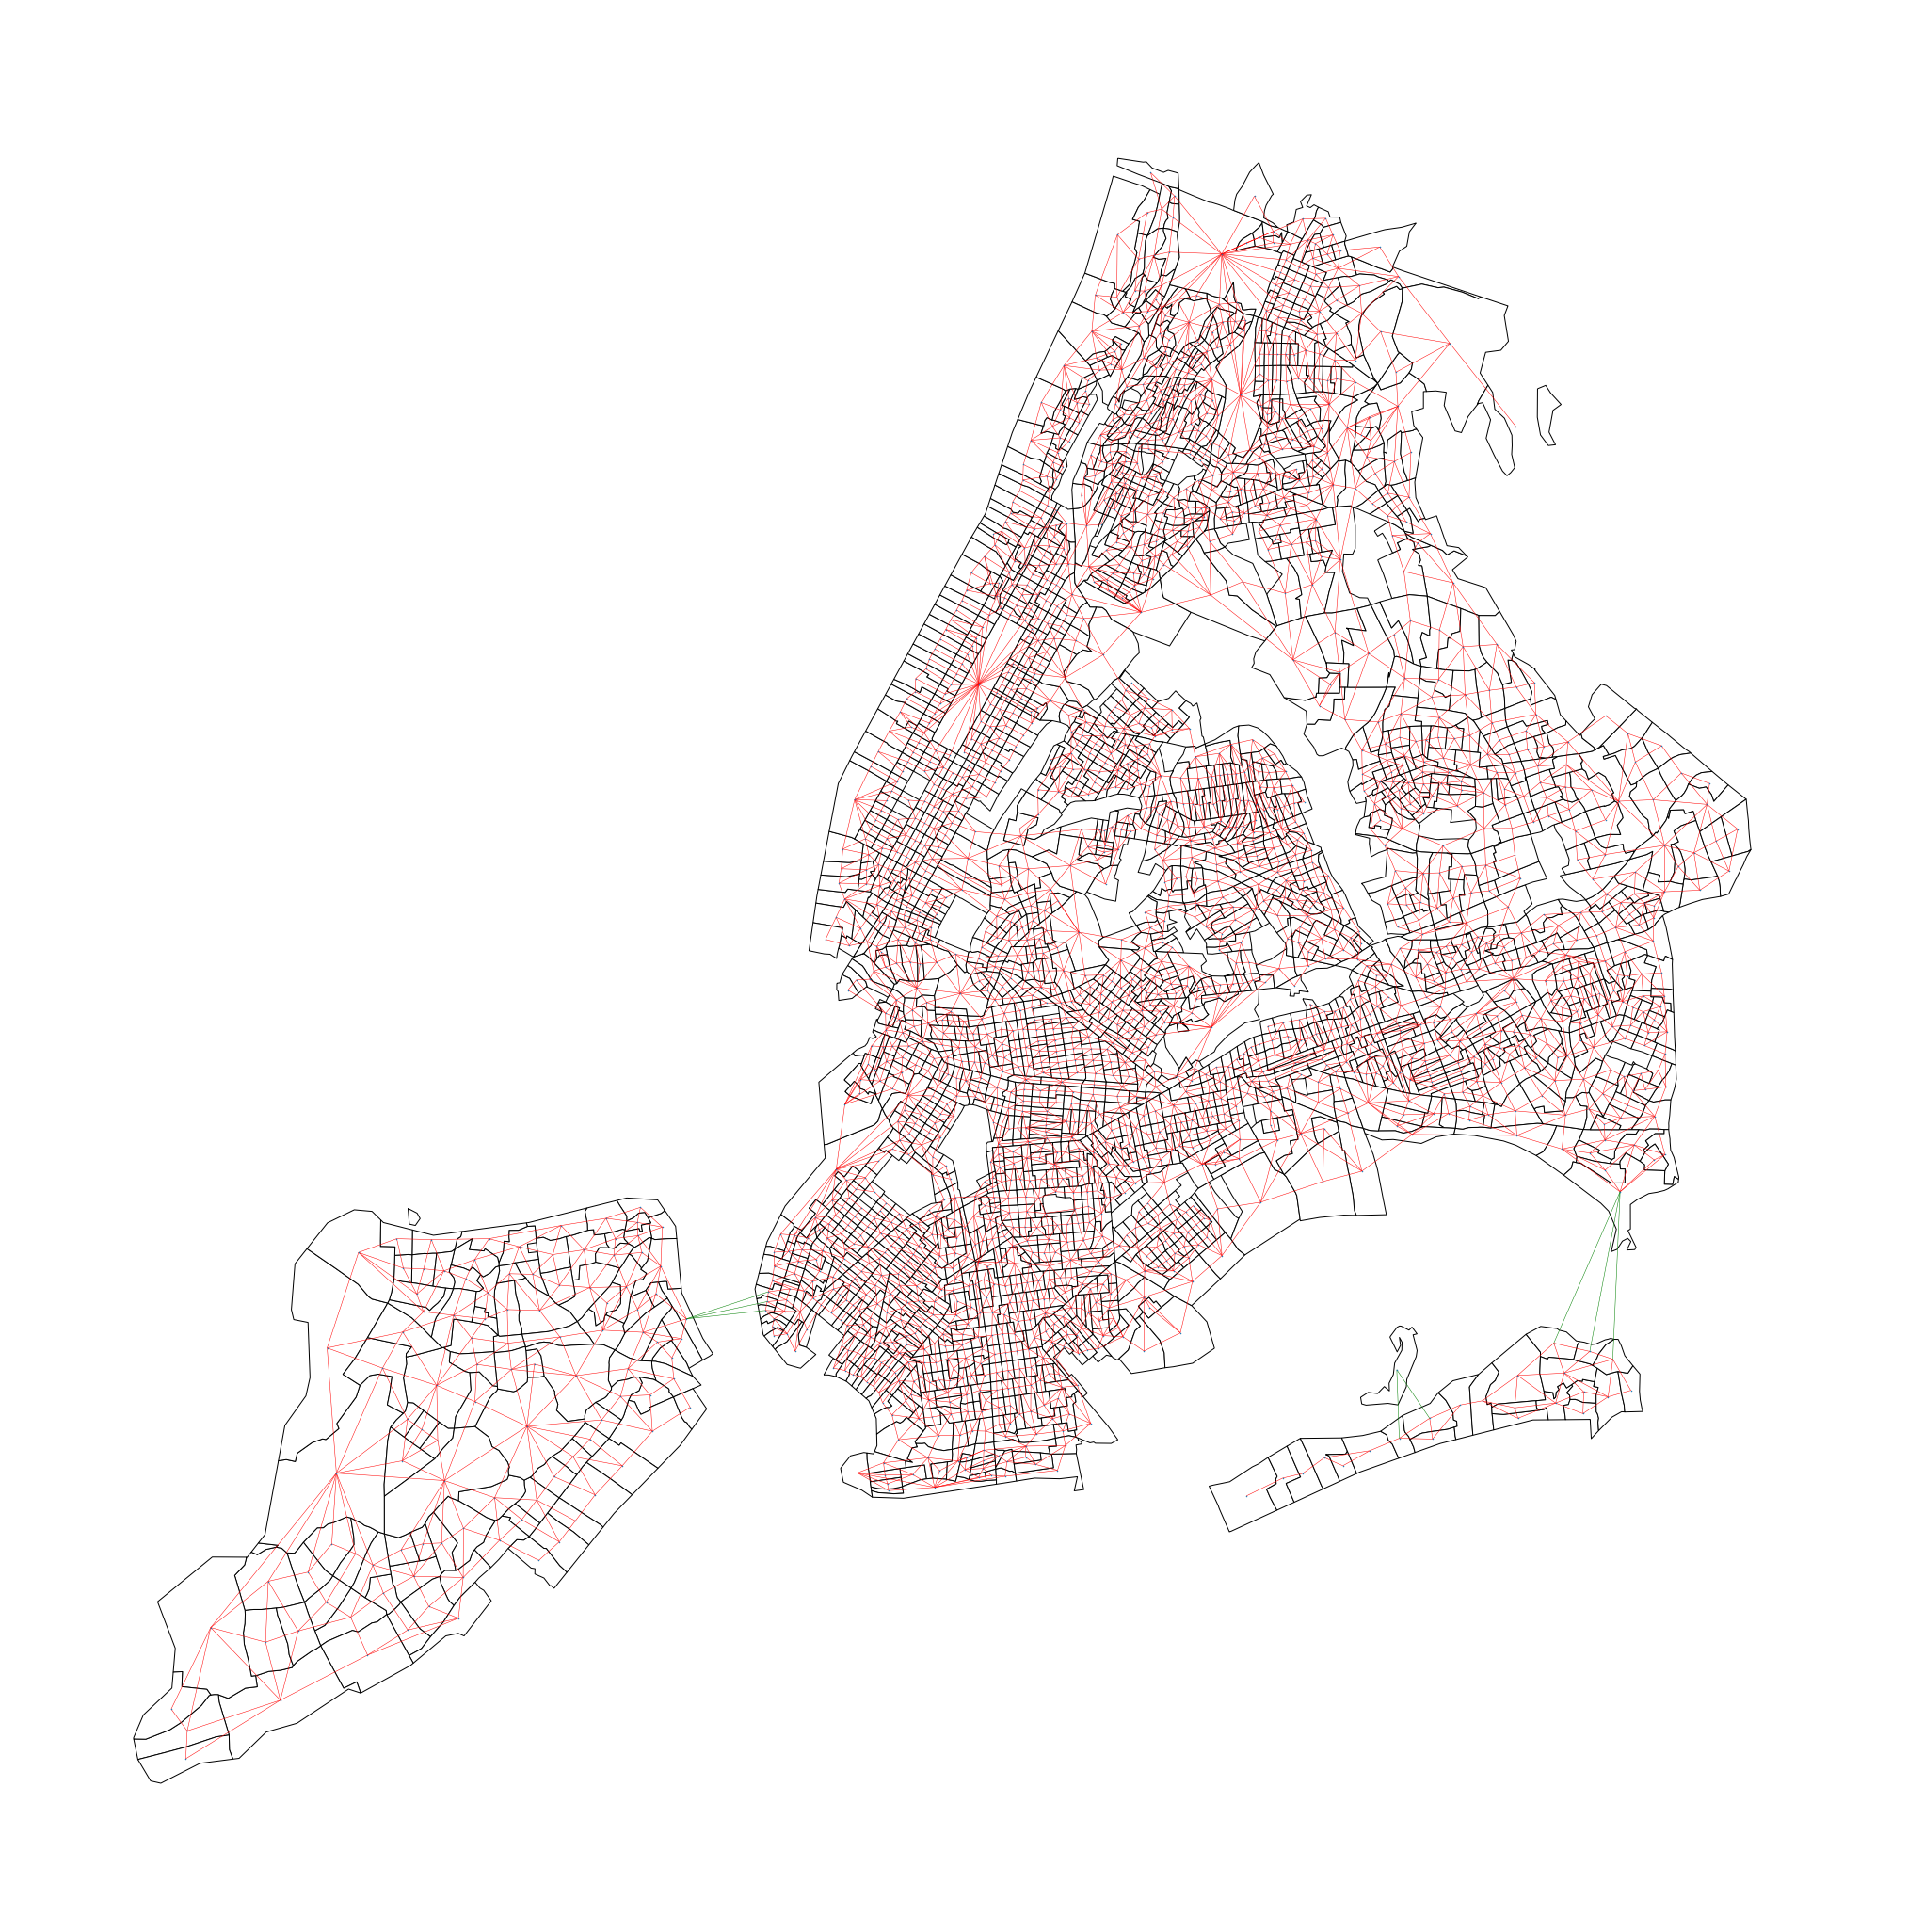

In [179]:
draw_adjacency_graph(tractsshp, adj_graph_connected)

<AxesSubplot:>

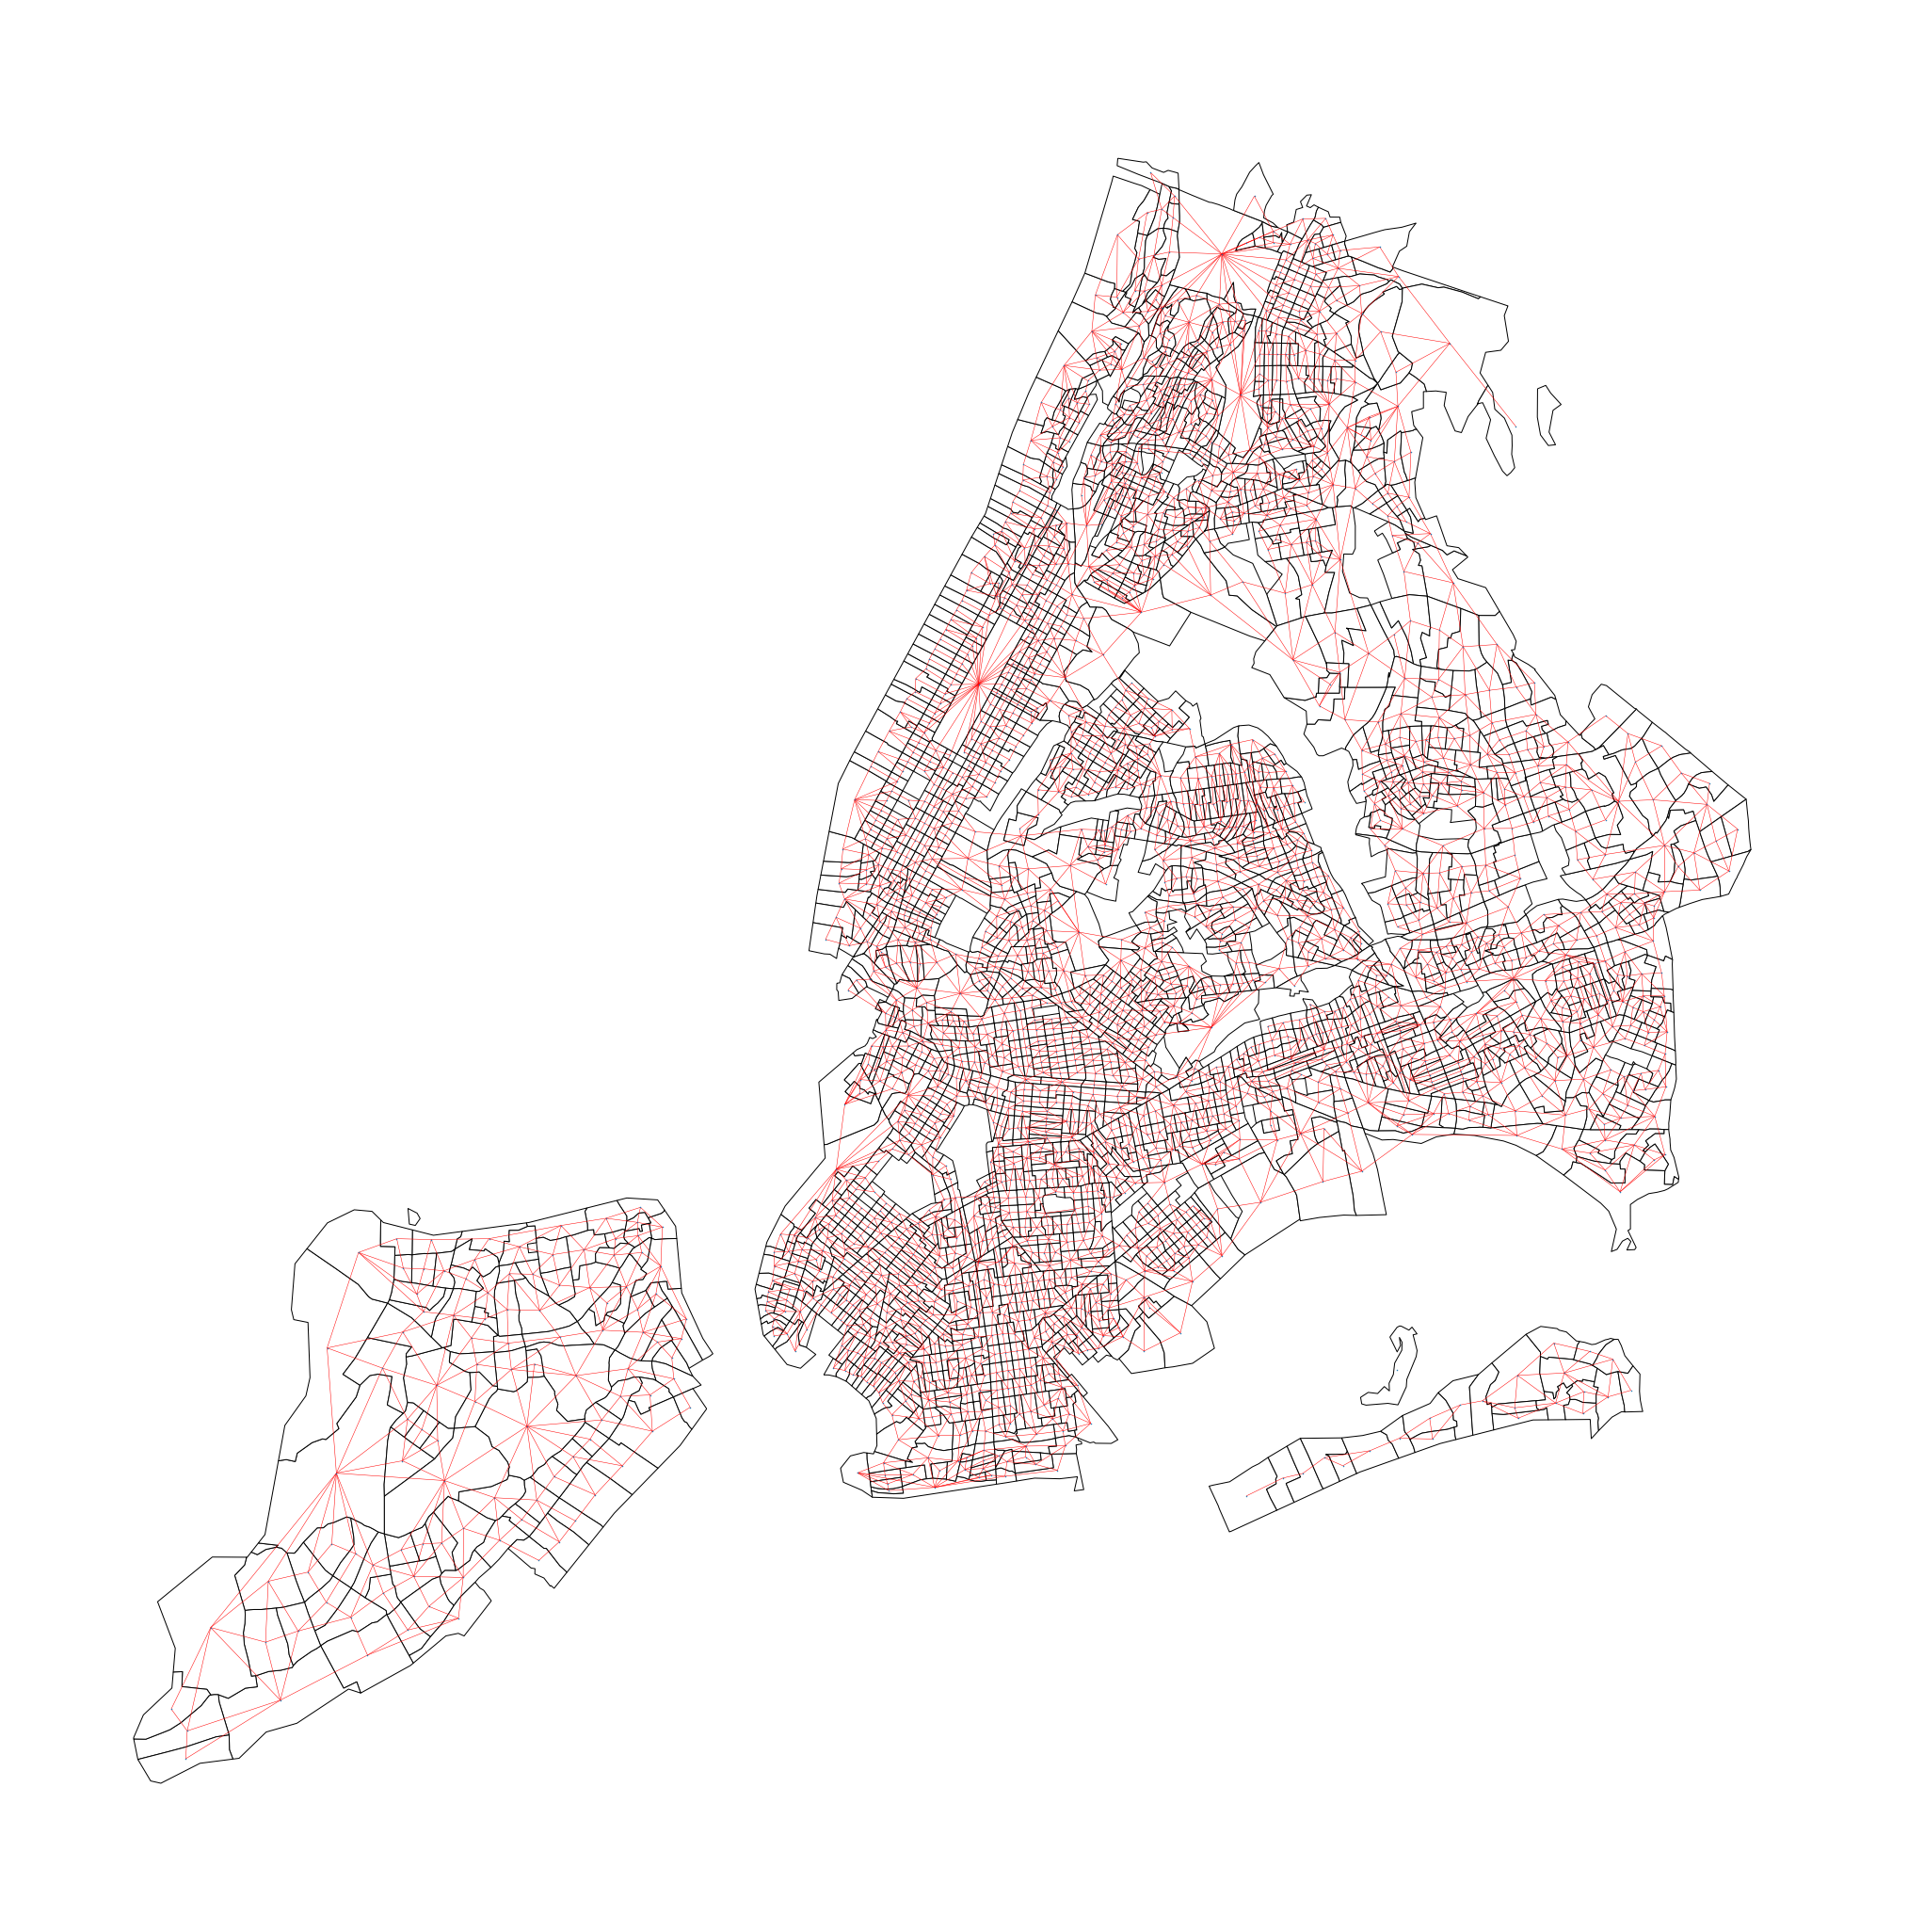

In [180]:
draw_adjacency_graph(tractsshp, adj_graph)

# develop using the matrix

#function: load the matrix file, takes as input list of census tracts as well in order. outputs the 2 lists of edges, etc

In [158]:
A = scipy.sparse.load_npz('tract_adjacency_connected.npz')
tractorderfile = pickle.load(open('tract_order_adjacency', 'rb') )

import pickle
def get_edge_lists(adjacency_file, tract_adjacency_order_file, aggdftractorder):
    A = scipy.sparse.load_npz(adjacency_file)
    tractorderadjacency_list = pickle.load(open(tract_adjacency_order_file, 'rb') )

    Adock = A.todok().keys()
    # print(Adoc.keys())
    print(len(Adock))
    Adock = list(sorted(set([tuple(sorted(x)) for x in Adock])))
    print(len(Adock))

    node1 = [None for i in range(len(Adock))]
    node2 = [None for i in range(len(Adock))]
    
    orig_mapping_to_node_lists = {} #covert adjacency matrix 0 indexed thing to node lists 1 index thing, but aligning the actual tract numbers for each
    for en, (n1, n2) in enumerate(Adock):
        if n1 not in orig_mapping_to_node_lists:
            orig_mapping_to_node_lists[n1] = aggdftractorder.index(tractorderadjacency_list[n1]) + 1
        node1[en] = orig_mapping_to_node_lists[n1]
        if n2 not in orig_mapping_to_node_lists:
            orig_mapping_to_node_lists[n2] = aggdftractorder.index(tractorderadjacency_list[n2]) + 1
        node2[en] = orig_mapping_to_node_lists[n2]
    # print(aggdftractlist[345], tractorderadjacency_list[0])
    return node1, node2
    
aggdftractlist = aggdf.census_tract.astype(str).str[0:11].drop_duplicates().tolist()
node1, node2 = get_edge_lists('tract_adjacency_connected.npz', 'tract_order_adjacency', aggdftractlist)

10620
5310
36005000200 36005000200


NameError: name 'tractorderadjacency_list' is not defined

In [145]:
print(A)

  (0, 1)	1.0
  (0, 2)	1.0
  (0, 4)	1.0
  (0, 60)	1.0
  (0, 1859)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 42)	1.0
  (1, 49)	1.0
  (1, 54)	1.0
  (1, 1859)	1.0
  (1, 1863)	1.0
  (2, 0)	1.0
  (2, 1)	1.0
  (2, 4)	1.0
  (2, 14)	1.0
  (2, 18)	1.0
  (2, 42)	1.0
  (2, 58)	1.0
  (3, 5)	1.0
  (3, 6)	1.0
  (3, 7)	1.0
  (3, 8)	1.0
  (3, 10)	1.0
  (3, 11)	1.0
  :	:
  (2084, 2088)	1.0
  (2085, 2067)	1.0
  (2085, 2068)	1.0
  (2085, 2084)	1.0
  (2085, 2086)	1.0
  (2085, 2088)	1.0
  (2086, 2067)	1.0
  (2086, 2085)	1.0
  (2086, 2087)	1.0
  (2086, 2088)	1.0
  (2087, 2064)	1.0
  (2087, 2086)	1.0
  (2087, 2088)	1.0
  (2088, 2081)	1.0
  (2088, 2084)	1.0
  (2088, 2085)	1.0
  (2088, 2086)	1.0
  (2088, 2087)	1.0
  (2089, 226)	1.0
  (2089, 230)	1.0
  (2090, 310)	1.0
  (2090, 318)	1.0
  (2091, 303)	1.0
  (2091, 314)	1.0
  (2091, 319)	1.0


In [136]:
tractorderfile

['36005000200',
 '36005000400',
 '36005001600',
 '36005001900',
 '36005002000',
 '36005002300',
 '36005002500',
 '36005002701',
 '36005002702',
 '36005002800',
 '36005003100',
 '36005003300',
 '36005003500',
 '36005003700',
 '36005003800',
 '36005003900',
 '36005004001',
 '36005004100',
 '36005004200',
 '36005004300',
 '36005004400',
 '36005004600',
 '36005004800',
 '36005005001',
 '36005005002',
 '36005005100',
 '36005005200',
 '36005005400',
 '36005005600',
 '36005005902',
 '36005006000',
 '36005006200',
 '36005006300',
 '36005006400',
 '36005006500',
 '36005006700',
 '36005006800',
 '36005006900',
 '36005007000',
 '36005007100',
 '36005007200',
 '36005007300',
 '36005007400',
 '36005007500',
 '36005007600',
 '36005007700',
 '36005007800',
 '36005007900',
 '36005008300',
 '36005008400',
 '36005008500',
 '36005008600',
 '36005008700',
 '36005008900',
 '36005009000',
 '36005009200',
 '36005009300',
 '36005009600',
 '36005009800',
 '36005011502',
 '36005011700',
 '36005011800',
 '360050

In [133]:
print(A)

  (0, 1)	1.0
  (0, 2)	1.0
  (0, 4)	1.0
  (0, 60)	1.0
  (0, 1859)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 42)	1.0
  (1, 49)	1.0
  (1, 54)	1.0
  (1, 1859)	1.0
  (1, 1863)	1.0
  (2, 0)	1.0
  (2, 1)	1.0
  (2, 4)	1.0
  (2, 14)	1.0
  (2, 18)	1.0
  (2, 42)	1.0
  (2, 58)	1.0
  (3, 5)	1.0
  (3, 6)	1.0
  (3, 7)	1.0
  (3, 8)	1.0
  (3, 10)	1.0
  (3, 11)	1.0
  :	:
  (2084, 2088)	1.0
  (2085, 2067)	1.0
  (2085, 2068)	1.0
  (2085, 2084)	1.0
  (2085, 2086)	1.0
  (2085, 2088)	1.0
  (2086, 2067)	1.0
  (2086, 2085)	1.0
  (2086, 2087)	1.0
  (2086, 2088)	1.0
  (2087, 2064)	1.0
  (2087, 2086)	1.0
  (2087, 2088)	1.0
  (2088, 2081)	1.0
  (2088, 2084)	1.0
  (2088, 2085)	1.0
  (2088, 2086)	1.0
  (2088, 2087)	1.0
  (2089, 226)	1.0
  (2089, 230)	1.0
  (2090, 310)	1.0
  (2090, 318)	1.0
  (2091, 303)	1.0
  (2091, 314)	1.0
  (2091, 319)	1.0
